## Titanic Dataset EDA

## 1. Introduction
-The Titanic dataset contains passenger information including age, sex, fare, class, and survival status.  
-Objective: To analyze factors influencing survival and understand passenger demographics.

In [63]:
import numpy as np   #import libraries    
import pandas as pd    
import seaborn as sns

In [64]:
data = pd.read_csv('Titanic-Dataset.csv')  #load dataset

## 2. Data Overview
- Total passengers: 891  
- Columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked  

In [65]:
 data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
data.info() #Gives the informations like datatypes counts shapes etc.....

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
data.isnull().sum() # Check any Null values in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
data.nunique() # check the unique values in the Colums

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [69]:
average_age = data['Age'].mean() # Replace null values of age with mean value
data['Age'].fillna(average_age, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_13872\187158739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(average_age, inplace=True)


## 3.SURVIVAL ANALYSIS
Count and percentage of survivors vs non-survivors

In [70]:
survived_data = (data['Survived'].value_counts().reset_index(name='Count')) #Create a new variable 'survived_data' to find the survived count in the dataset
survived_data['Percentage'] = (survived_data['Count'] / len(data)) * 100 
survived_data["Survived"]=survived_data["Survived"].map({1:"Yes",0:"no"}) #Map the survived count into 1='yes' , 0='No'
survived_data = survived_data.round(2)
survived_data

,Survived,Count,Percentage
0,no,549,61.62
1,Yes,342,38.38


C:\Users\USER\AppData\Local\Temp\ipykernel_13872\3207786415.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Survived' , y='Count' , data=survived_data, palette='pastel')


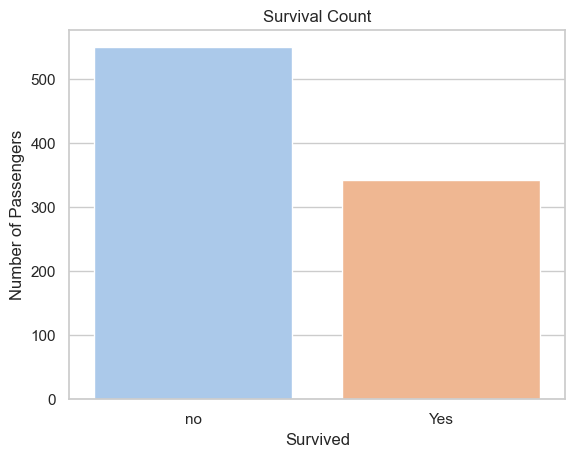

In [93]:
sns.barplot(x='Survived' , y='Count' , data=survived_data, palette='pastel')
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.show()

## Insights:

-Around 38% of passengers survived, 62% did not.
-Survival rate varied significantly by sex and class.

## 4.SEX-BASED ANALYSIS

Passenger distribution by sex and survival rate

In [72]:
# Count values in 'Sex' column
sex_data = data['Sex'].value_counts().reset_index(name='Count')

# Calculate percentage
sex_data['Percentage'] = (sex_data['Count'] / len(data)) * 100

# Rename column for clarity
sex_data.rename(columns={'index': 'Sex'}, inplace=True)

# Round values
sex_data = sex_data.round(2)
sex_data


,Sex,Count,Percentage
0,male,577,64.76
1,female,314,35.24


C:\Users\USER\AppData\Local\Temp\ipykernel_13872\2585997680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Count', data=sex_data, palette=colors)


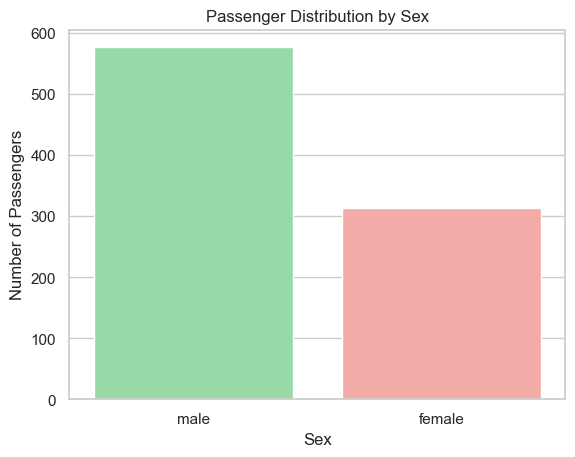

In [73]:
colors = sns.color_palette("pastel")[2:4] 
sns.barplot(x='Sex', y='Count', data=sex_data, palette=colors)
plt.title("Passenger Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.show()


In [74]:
# Group by Survived and Sex
sex_survival = data.groupby(['Sex', 'Survived']).size().reset_index(name='Count')

sex_survival['Percentage'] = sex_survival.groupby('Sex')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Map Survived for clarity
sex_survival['Survived'] = sex_survival['Survived'].map({1: 'Yes', 0: 'No'})

# Round for neatness
sex_survival = sex_survival.round(2)
sex_survival



,Sex,Survived,Count,Percentage
0,female,No,81,25.80
1,female,Yes,233,74.20
2,male,No,468,81.11
3,male,Yes,109,18.89


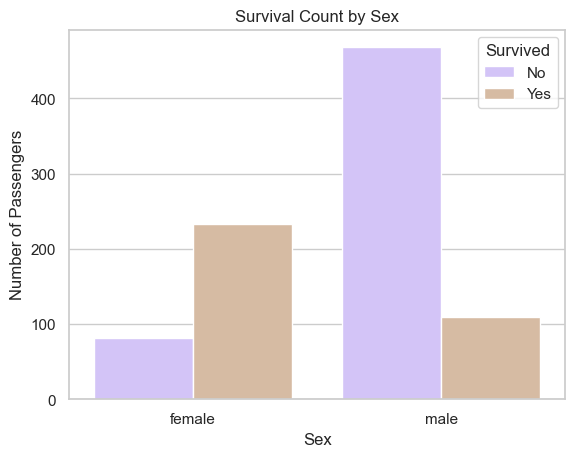

In [75]:
colors = sns.color_palette("pastel")[4:6]
sns.barplot(x='Sex', y='Count', hue='Survived', data=sex_survival, palette=colors) # "hue" -'Survived' splits each x-axis category into subgroups based on survival, creating separate colored bars for "Yes" and "No" within each sex.
plt.title("Survival Count by Sex")
plt.xlabel("Sex") 
plt.ylabel("Number of Passengers")
plt.show()

## Insights:

-Females had a higher survival rate than males.
-Males were the majority of passengers, but had lower survival.

## 5.PASSENGER CLASS ANALYSIS

Distribution and survival by class

In [76]:
# Count passengers by Pclass
pclass_data = data['Pclass'].value_counts().reset_index(name='Count')

# Rename column for clarity
pclass_data.rename(columns={'index': 'Pclass'}, inplace=True)

# Calculate percentage
pclass_data['Percentage'] = (pclass_data['Count'] / len(data)) * 100

# Round for neatness
pclass_data = pclass_data.round(2)

print(pclass_data)



   Pclass  Count  Percentage
0       3    491       55.11
1       1    216       24.24
2       2    184       20.65


C:\Users\USER\AppData\Local\Temp\ipykernel_13872\1569338683.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Count', data=pclass_data, palette=colors)


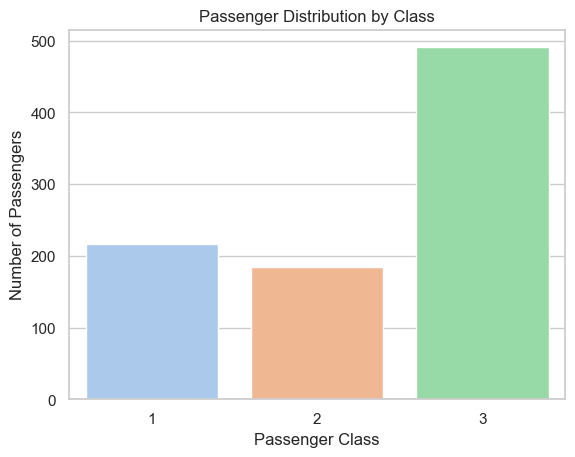

In [77]:
colors = sns.color_palette("pastel", 3)

# Barplot
sns.barplot(x='Pclass', y='Count', data=pclass_data, palette=colors)

plt.title("Passenger Distribution by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.show()

In [78]:
# Group by Pclass, Sex and Survived
pclass_sex_survived = data.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Count')

# Calculate percentage within each Pclass & Sex group
pclass_sex_survived['Percentage'] = pclass_sex_survived.groupby(['Pclass', 'Sex'])['Count'].transform(lambda x: (x / x.sum()) * 100)

# Round for neatness
pclass_sex_survived = pclass_sex_survived.round(2)

print(pclass_sex_survived)


    Pclass     Sex  Survived  Count  Percentage
0        1  female         0      3        3.19
1        1  female         1     91       96.81
2        1    male         0     77       63.11
3        1    male         1     45       36.89
4        2  female         0      6        7.89
5        2  female         1     70       92.11
6        2    male         0     91       84.26
7        2    male         1     17       15.74
8        3  female         0     72       50.00
9        3  female         1     72       50.00
10       3    male         0    300       86.46
11       3    male         1     47       13.54


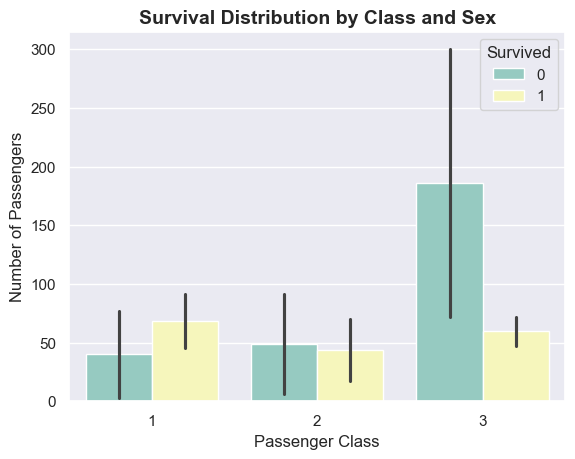

In [79]:
sns.set_theme(style="darkgrid")

# Barplot with a new color palette
sns.barplot(
    x="Pclass",
    y="Count",
    hue="Survived",
    data=pclass_sex_survived,
    palette="Set3"   # Changed from pastel to Set2
)

plt.title("Survival Distribution by Class and Sex", fontsize=14, weight="bold")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")

plt.show()



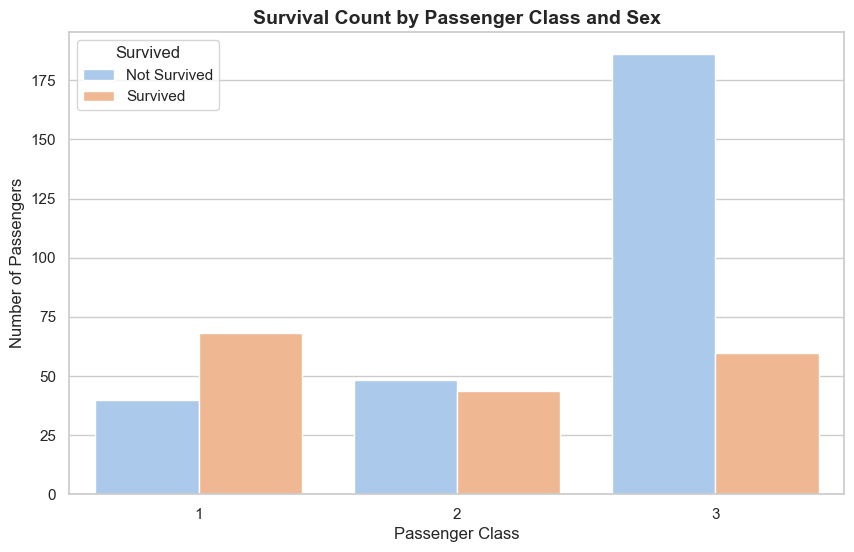

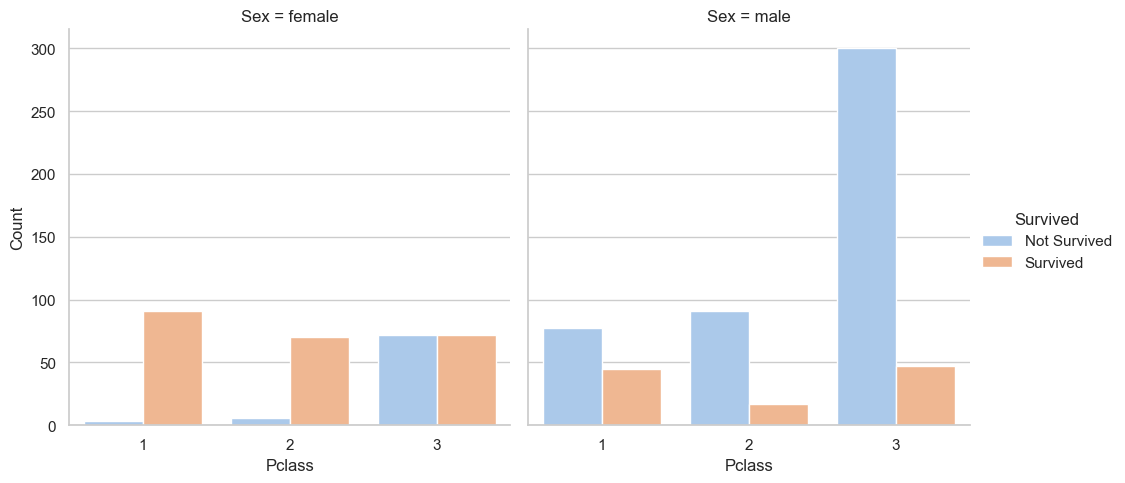

In [80]:
# Group and prepare the data
pclass_sex_survived = data.groupby(["Pclass", "Sex", "Survived"]).size().reset_index(name="Count")
pclass_sex_survived["Survived"] = pclass_sex_survived["Survived"].map({0:"Not Survived", 1:"Survived"})

# Set theme
sns.set_theme(style="whitegrid")

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    x="Pclass",
    y="Count",
    hue="Survived",
    data=pclass_sex_survived,
    palette="pastel",
    errorbar=None
)

# Add title and labels
plt.title("Survival Count by Passenger Class and Sex", fontsize=14, weight='bold')
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)

# Split bars by sex using facet
sns.catplot(
    x="Pclass",
    y="Count",
    hue="Survived",
    col="Sex",  # creates separate plots for Male and Female
    data=pclass_sex_survived,
    kind="bar",
    palette="pastel",
    height=5,
    aspect=1
)

plt.show()


In [81]:
Age_table =pd.DataFrame(data['Age']) #Create a data frame of age 
Age_table

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


## Insights:

-Most passengers were in 3rd class.
-1st class had the highest survival percentage.
-Female passengers in 1st class had the best survival rate. 

## 6.Age analysis

Age distribution and survival comparison

<Axes: xlabel='Age', ylabel='Count'>

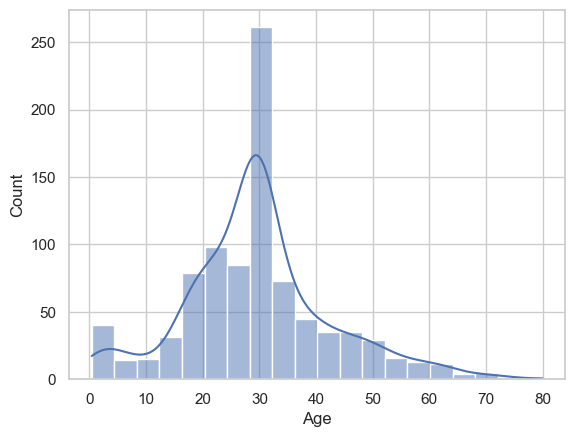

In [82]:
sns.histplot(data['Age'], bins=20, kde=True) # Plot the distribution of passenger ages. plt.title("Age Distribution") plt.show()
#KDE curve shows the smoothed probability density of ages.

In [83]:
age_sex_table = data[['Age', 'Sex']]
age_sex_table

,Age,Sex
0,22.000000,male
1,38.000000,female
2,26.000000,female
3,35.000000,female
4,35.000000,male
...,...,...
886,27.000000,male
887,19.000000,female
888,29.699118,female
889,26.000000,male


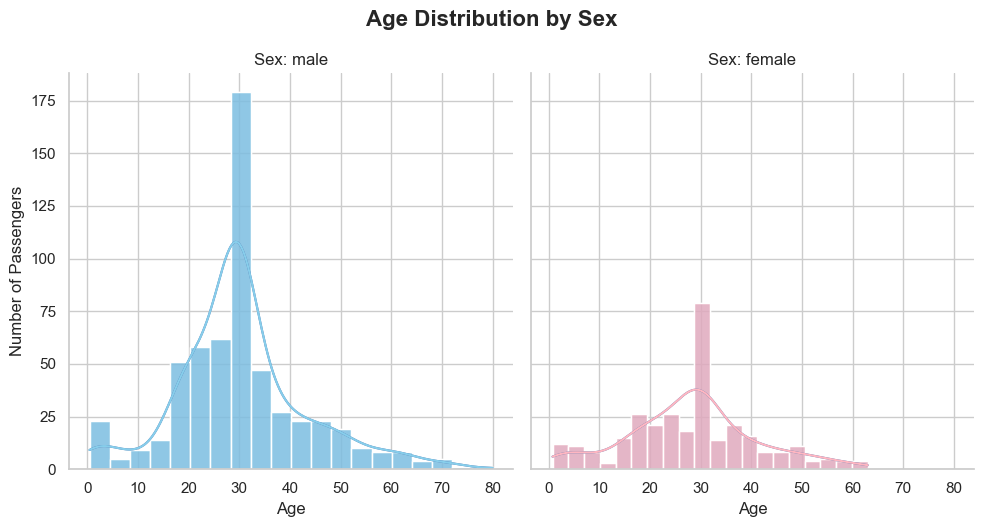

In [84]:
sns.set_theme(style="whitegrid")

# Map custom colors to each sex
sex_colors = {"male": "skyblue", "female": "lightpink"}

# Separate histograms per sex
g = sns.FacetGrid(data, col="Sex", height=5, aspect=1)
g.map_dataframe(sns.histplot, x="Age", bins=20, kde=True,
                color=None)  # we'll set color inside loop

# Apply custom colors
for ax, sex in zip(g.axes.flat, ["male", "female"]):
    sns.histplot(data[data["Sex"] == sex]["Age"], bins=20, kde=True,
                 color=sex_colors[sex], alpha=0.7, ax=ax)

g.set_axis_labels("Age", "Number of Passengers")
g.set_titles("Sex: {col_name}")
plt.suptitle("Age Distribution by Sex", fontsize=16, weight='bold', y=1.05)
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_13872\3292749544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


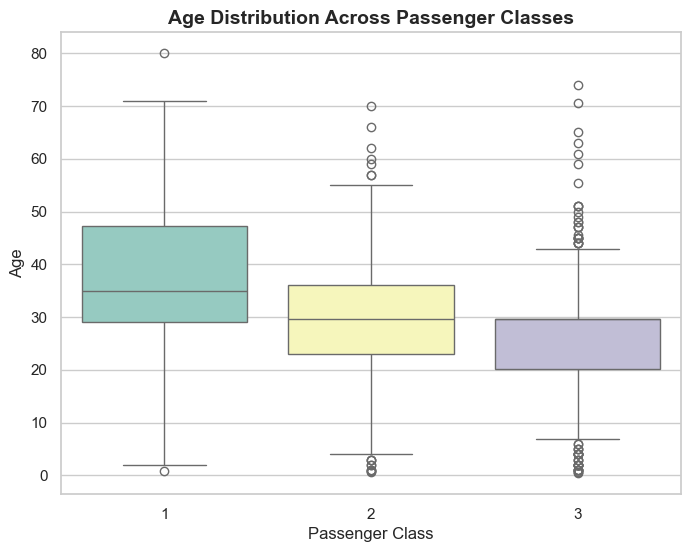

In [85]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8,6))
sns.boxplot(
    x="Pclass",
    y="Age",
    data=data,
    palette="Set3"  # pastel-like colors
)
plt.title("Age Distribution Across Passenger Classes", fontsize=14, weight='bold')
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()

## Insights:

-Age distribution peaks around 20–40 years.
-Children and young adults had slightly higher survival rates.
-Older passengers were mostly in 1st class.

## 7.FARE & REVENUE ANALYSIS

Total and average fare by class

In [86]:
revenue_data = data.groupby("Pclass")["Fare"].sum().reset_index() # Calculate the total revenue (sum of fares) from each passenger class  
revenue_data.columns = ["Pclass", "TotalRevenue"]
revenue_data

,Pclass,TotalRevenue
0,1,18177.4125
1,2,3801.8417
2,3,6714.6951


C:\Users\USER\AppData\Local\Temp\ipykernel_13872\3443615955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass" , y="TotalRevenue" , data=revenue_data , palette='pastel' )


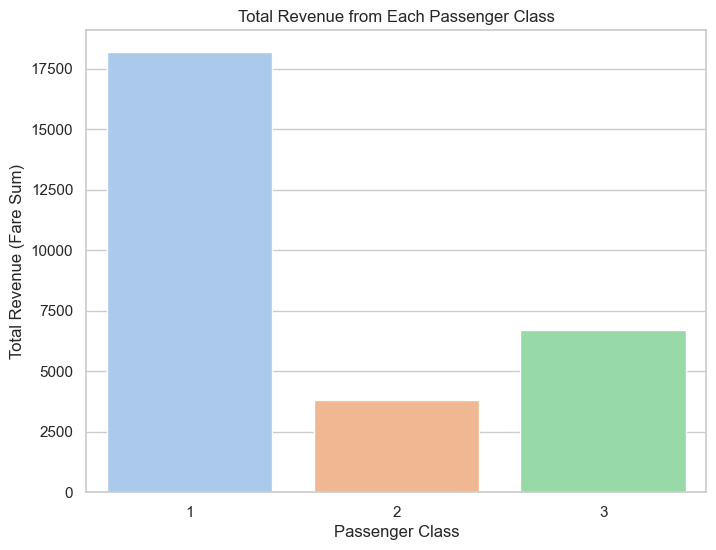

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(x="Pclass" , y="TotalRevenue" , data=revenue_data , palette='pastel' )
plt.title("Total Revenue from Each Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Total Revenue (Fare Sum)")
plt.show()

In [88]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

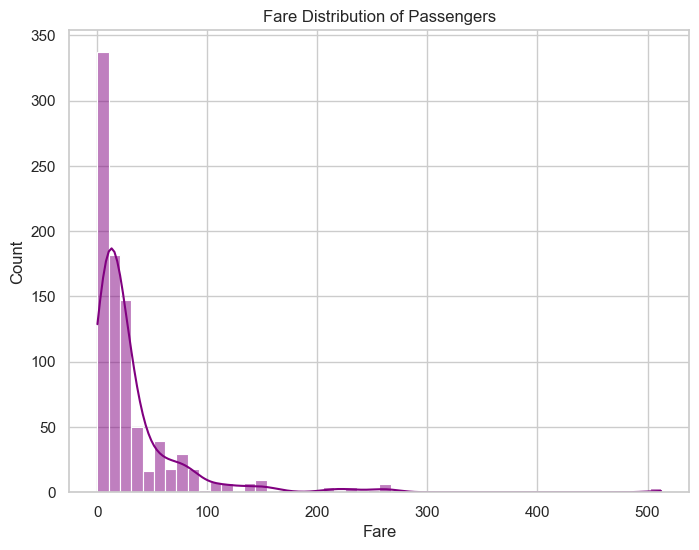

In [89]:
plt.figure(figsize=(8,6))
sns.histplot(data["Fare"], bins=50, kde=True, color="purple") 
plt.title("Fare Distribution of Passengers")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_13872\4061820859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="Pclass", y="Fare", estimator=np.mean, palette="Set2")


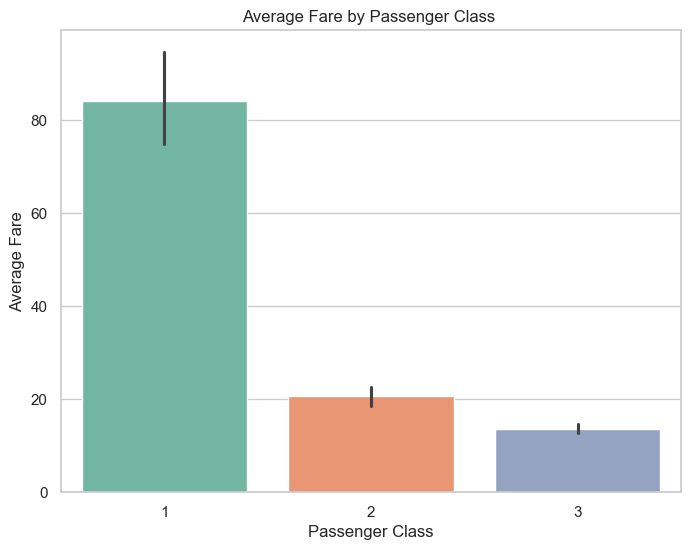

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(data=data, x="Pclass", y="Fare", estimator=np.mean, palette="Set2")
plt.title("Average Fare by Passenger Class ")
plt.xlabel("Passenger Class")
plt.ylabel("Average Fare")
plt.show()


## Insights:

-1st class contributed the most revenue despite fewer passengers.
-Fare distribution is skewed; most passengers paid a low fare.